In [1]:
import pandas as pd

C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('Presentation - omics challenge Data.xlsx', index_col=0, header=1)

In [3]:
df.head()

,Label,sulfo-l-cystine,Aspartic acid,threonine,serine,glutamic acid,glutamine,proline,glycine,alanine,...,AOC1,SLC26A2,YWHAE,CAMK2D,FHL1,UGP2,DHRS9,WDR26,METTL7A,PRG3
Sample,,,,,,,,,,,,,,,,,,,,,
003-0058,Control,14,513,275,331,1036,233,176,441,792,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0065,Control,9,202,135,137,437,83,84,181,308,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0080,Control,16,327,205,214,412,156,81,249,459,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0083,Control,0,103,61,67,157,44,35,96,140,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0181,Control,0,106,62,65,123,39,34,71,139,...,0,0,0,0.692559,0,0.692559,0.692559,0,0.692559,0.692559


In [4]:
df.columns

Index(['Label', 'sulfo-l-cystine', 'Aspartic acid', 'threonine', 'serine',
       'glutamic acid', 'glutamine', 'proline', 'glycine', 'alanine',
       ...
       'AOC1', 'SLC26A2', 'YWHAE', 'CAMK2D', 'FHL1', 'UGP2', 'DHRS9', 'WDR26',
       'METTL7A', 'PRG3'],
      dtype='object', length=521)

In [5]:
target = df['Label']

In [6]:
target.head()

Sample 
003-0058    Control
003-0065    Control
003-0080    Control
003-0083    Control
003-0181    Control
Name: Label, dtype: object

In [7]:
df = df.drop(['Label'], axis=1)
df.head()

,sulfo-l-cystine,Aspartic acid,threonine,serine,glutamic acid,glutamine,proline,glycine,alanine,citrulline,...,AOC1,SLC26A2,YWHAE,CAMK2D,FHL1,UGP2,DHRS9,WDR26,METTL7A,PRG3
Sample,,,,,,,,,,,,,,,,,,,,,
003-0058,14,513,275,331,1036,233,176,441,792,344,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0065,9,202,135,137,437,83,84,181,308,114,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0080,16,327,205,214,412,156,81,249,459,210,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0083,0,103,61,67,157,44,35,96,140,55,...,0,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000
003-0181,0,106,62,65,123,39,34,71,139,55,...,0,0,0,0.692559,0,0.692559,0.692559,0,0.692559,0.692559


In [8]:
df_amino = df.iloc[:,0:21]
df_prot = df.iloc[:,21:]

In [9]:
df_amino.shape

(24, 21)

In [10]:
df_prot.shape

(24, 499)

Scaling using MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_amino_scaled = pd.DataFrame(scaler.fit_transform(df_amino), columns=df_amino.columns, index=df.index)
df_prot_scaled = pd.DataFrame(scaler.fit_transform(df_prot), columns = df_prot.columns, index=df.index)

In [12]:
df_amino_scaled.head()

,sulfo-l-cystine,Aspartic acid,threonine,serine,glutamic acid,glutamine,proline,glycine,alanine,citrulline,...,methionine,isoleucine,leucine,tyrosine,phenylalanine,ethanolamine,ornitine,lysine,histidine,tryptofaan
Sample,,,,,,,,,,,,,,,,,,,,,
003-0058,0.823529,1.000000,0.740484,0.823529,1.000000,1.000000,0.175971,0.375254,0.422107,1.000000,...,0.571429,0.514107,0.488449,0.504673,0.477578,0.585366,0.151194,0.613466,0.314286,0.381356
003-0065,0.529412,0.241463,0.256055,0.222910,0.343921,0.226804,0.064320,0.111562,0.109244,0.204152,...,0.142857,0.136364,0.134213,0.114486,0.134529,0.390244,0.055703,0.130923,0.064286,0.067797
003-0080,0.941176,0.546341,0.498270,0.461300,0.316539,0.603093,0.060680,0.180527,0.206852,0.536332,...,0.313589,0.275862,0.261826,0.278037,0.273543,0.414634,0.079576,0.261845,0.392857,0.237288
003-0083,0.000000,0.000000,0.000000,0.006192,0.037240,0.025773,0.004854,0.025355,0.000646,0.000000,...,0.000000,0.004702,0.000000,0.000000,0.000000,0.243902,0.018568,0.019950,0.057143,0.000000
003-0181,0.000000,0.007317,0.003460,0.000000,0.000000,0.000000,0.003641,0.000000,0.000000,0.000000,...,0.003484,0.000000,0.020902,0.007009,0.013453,0.560976,0.000000,0.000000,0.000000,0.042373


In [13]:
df_prot_scaled.head()

,FCGBP,SERPINA1,MGAM,ALB,AMY2A,IGHA1,IGKC,DPP4,PIGR,CELA2A;CELA2B,...,AOC1,SLC26A2,YWHAE,CAMK2D,FHL1,UGP2,DHRS9,WDR26,METTL7A,PRG3
Sample,,,,,,,,,,,,,,,,,,,,,
003-0058,1.000000,0.044031,0.605296,0.006749,0.514637,0.412714,0.491232,0.603375,0.244652,0.076970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-0065,0.226315,0.309666,0.955158,0.043666,0.062909,0.242145,0.269030,1.000000,0.219370,0.071109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-0080,0.875285,0.233289,0.523762,0.007775,0.089913,0.428093,0.460688,0.444478,0.292745,0.344245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-0083,0.672030,0.119042,0.604747,0.012512,0.032045,0.547113,0.480473,0.366539,0.481147,0.176847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-0181,0.674010,0.039942,0.302895,0.295884,0.031089,0.474004,0.087515,0.267739,0.352824,0.112990,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [14]:
(df == 0).astype(int).sum(axis=0) #checking count of zeros across samples for each feature
#(df == 0).astype(int).sum(axis=0).to_csv('count.csv')

sulfo-l-cystine     2
Aspartic acid       0
threonine           0
serine              0
glutamic acid       0
                   ..
UGP2               23
DHRS9              23
WDR26              24
METTL7A            23
PRG3               23
Length: 520, dtype: int64

Scaling using StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_amino_scaled = pd.DataFrame(scaler.fit_transform(df_amino), columns=df_amino.columns, index=df.index)
df_prot_scaled = pd.DataFrame(scaler.fit_transform(df_prot), columns = df_prot.columns, index=df.index)

In [16]:
df_amino_scaled.head()

,sulfo-l-cystine,Aspartic acid,threonine,serine,glutamic acid,glutamine,proline,glycine,alanine,citrulline,...,methionine,isoleucine,leucine,tyrosine,phenylalanine,ethanolamine,ornitine,lysine,histidine,tryptofaan
Sample,,,,,,,,,,,,,,,,,,,,,
003-0058,0.659232,2.159326,1.238121,1.719032,2.477004,1.992662,0.183391,0.760613,0.904416,2.473291,...,1.455755,1.260373,0.920146,1.297224,0.851871,0.524750,0.319790,1.529857,0.315802,0.825522
003-0065,-0.504118,-0.860009,-0.717726,-0.758162,-0.291356,-0.852869,-0.404311,-0.625146,-0.653830,-0.885274,...,-0.623292,-0.604553,-0.713790,-0.694072,-0.679995,-0.359039,-0.177150,-0.807970,-0.758181,-0.664444
003-0080,1.124572,0.353550,0.260197,0.225054,-0.406897,0.531956,-0.423475,-0.262717,-0.167683,0.516562,...,0.204947,0.084154,-0.125167,0.140603,-0.059239,-0.248566,-0.052915,-0.173676,0.653340,0.140943
003-0083,-2.598149,-1.821148,-1.751530,-1.651994,-1.585414,-1.592707,-0.717326,-1.078183,-1.194709,-1.746819,...,-1.316307,-1.254569,-1.332859,-1.278345,-1.280726,-1.021881,-0.370404,-1.345610,-0.788866,-0.986599
003-0181,-2.598149,-1.792023,-1.737560,-1.677532,-1.742549,-1.687558,-0.723715,-1.211429,-1.197929,-1.746819,...,-1.299404,-1.277784,-1.236446,-1.242573,-1.220653,0.414276,-0.467031,-1.442264,-1.034348,-0.785253


In [17]:
df_prot_scaled.head()

,FCGBP,SERPINA1,MGAM,ALB,AMY2A,IGHA1,IGKC,DPP4,PIGR,CELA2A;CELA2B,...,AOC1,SLC26A2,YWHAE,CAMK2D,FHL1,UGP2,DHRS9,WDR26,METTL7A,PRG3
Sample,,,,,,,,,,,,,,,,,,,,,
003-0058,1.309608,-0.785280,0.369315,-0.773320,1.075107,0.408072,0.438437,0.690798,-0.060560,-0.398074,...,0.0,0.0,0.0,-0.208514,0.0,-0.208514,-0.208514,0.0,-0.208514,-0.208514
003-0065,-1.166932,0.403897,1.735008,-0.626340,-0.638741,-0.401226,-0.325471,2.248799,-0.186784,-0.422294,...,0.0,0.0,0.0,-0.208514,0.0,-0.208514,-0.208514,0.0,-0.208514,-0.208514
003-0080,0.910398,0.061978,0.051047,-0.769234,-0.536289,0.481041,0.333429,0.066626,0.179542,0.706345,...,0.0,0.0,0.0,-0.208514,0.0,-0.208514,-0.208514,0.0,-0.208514,-0.208514
003-0083,0.259787,-0.449476,0.367174,-0.750378,-0.755840,1.045758,0.401448,-0.239529,1.120141,0.014632,...,0.0,0.0,0.0,-0.208514,0.0,-0.208514,-0.208514,0.0,-0.208514,-0.208514
003-0181,0.266124,-0.803583,-0.811112,0.377832,-0.759465,0.698873,-0.949502,-0.627629,0.479487,-0.249234,...,0.0,0.0,0.0,4.795832,0.0,4.795832,4.795832,0.0,4.795832,4.795832


In [18]:
(df == 0).astype(int).sum(axis=0)
#(df == 0).astype(int).sum(axis=0).to_csv('count1.csv') #checking count of zeros across samples for each feature

sulfo-l-cystine     2
Aspartic acid       0
threonine           0
serine              0
glutamic acid       0
                   ..
UGP2               23
DHRS9              23
WDR26              24
METTL7A            23
PRG3               23
Length: 520, dtype: int64

In [19]:
(df_prot == 0).astype(int).sum(axis=0)
#(df_prot == 0).astype(int).sum(axis=0).to_csv('count2.csv') #checking count of zeros across samples for each feature

FCGBP        0
SERPINA1     0
MGAM         0
ALB          0
AMY2A        0
            ..
UGP2        23
DHRS9       23
WDR26       24
METTL7A     23
PRG3        23
Length: 499, dtype: int64

Dropping columns having zero value in more than 90% samples in protein dataset

In [20]:
df_prot_scaled.drop(columns=df.columns[df.eq(0).mean()>0.9], inplace=True)

In [21]:
df_prot_scaled.shape

(24, 326)

In [22]:
df_prot_scaled.head()

,FCGBP,SERPINA1,MGAM,ALB,AMY2A,IGHA1,IGKC,DPP4,PIGR,CELA2A;CELA2B,...,FAH,PSMA3,S100P,PSMA5,TALDO1,PSMB3,PSMB9,HRG,CHIT1,ADIPOQ
Sample,,,,,,,,,,,,,,,,,,,,,
003-0058,1.309608,-0.785280,0.369315,-0.773320,1.075107,0.408072,0.438437,0.690798,-0.060560,-0.398074,...,-0.437841,-0.439336,-0.422589,-0.422781,-0.368284,-0.373150,-0.344327,-0.371444,-0.377509,-0.360593
003-0065,-1.166932,0.403897,1.735008,-0.626340,-0.638741,-0.401226,-0.325471,2.248799,-0.186784,-0.422294,...,-0.437841,-0.439336,-0.422589,-0.422781,-0.368284,-0.373150,4.059886,-0.371444,-0.377509,-0.360593
003-0080,0.910398,0.061978,0.051047,-0.769234,-0.536289,0.481041,0.333429,0.066626,0.179542,0.706345,...,-0.437841,-0.439336,-0.422589,-0.422781,-0.368284,-0.373150,-0.344327,-0.371444,-0.377509,-0.360593
003-0083,0.259787,-0.449476,0.367174,-0.750378,-0.755840,1.045758,0.401448,-0.239529,1.120141,0.014632,...,-0.437841,-0.439336,-0.422589,-0.422781,-0.368284,-0.373150,-0.344327,-0.371444,-0.377509,-0.360593
003-0181,0.266124,-0.803583,-0.811112,0.377832,-0.759465,0.698873,-0.949502,-0.627629,0.479487,-0.249234,...,-0.437841,1.760545,1.937673,1.933339,3.456432,1.975986,-0.344327,-0.371444,-0.377509,-0.360593


In [23]:
df_combined = pd.concat([df_amino_scaled,df_prot_scaled], axis=1)

In [24]:
df_combined.shape

(24, 347)

Train-test splitting

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_combined, target, stratify=target, random_state=42)

Classification using Random Forest and grid search to tune hyper-parameters

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2,4,8,16],
    'min_samples_leaf': [2, 3],
    'n_estimators': [4, 8]
}
#Create a based model
rf = RandomForestClassifier()

grid = GridSearchCV(rf,param_grid=param_grid,cv=4,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 8}
Best score is: 0.8875


In [40]:
from sklearn.metrics import accuracy_score, classification_report

rf_optimized = model_grid.best_estimator_
y_pred = rf_optimized.predict(X_test)
print('Accuracy: {:0.2f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

         CRC       1.00      0.67      0.80         3
     Control       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



# Feature Selection

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(rf_optimized.feature_importances_, index=df_combined.columns)
sorted_features = forest_importances.sort_values(ascending=False)

In [51]:
sorted_features

CA2             0.125000
CTRB2;CTRB1     0.125000
isoleucine      0.125000
KRT1            0.117788
glutamine       0.116979
                  ...   
ORM1            0.000000
CDHR5           0.000000
PLA2G1B         0.000000
CKMT1A;CKMT2    0.000000
ADIPOQ          0.000000
Length: 347, dtype: float64

In [49]:
#Select number of features
n=20

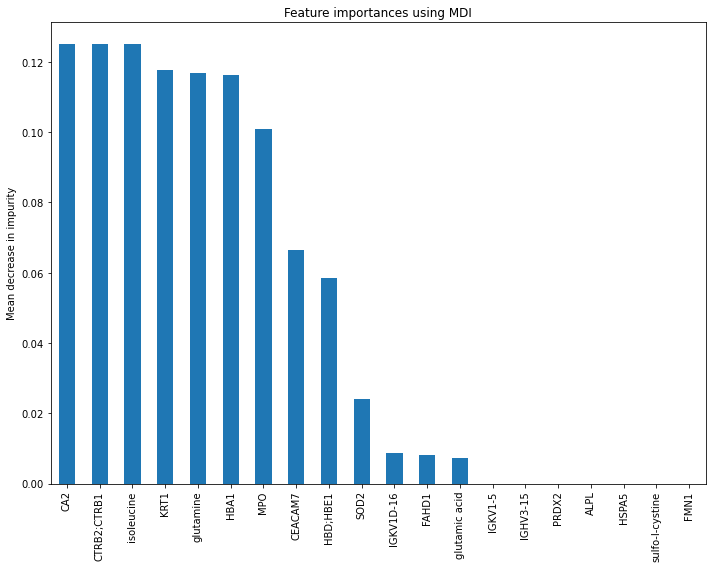

In [50]:
fig, ax = plt.subplots(figsize=(10,8))
sorted_features[0:n].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Feature selection using SVM

In [56]:
from matplotlib import pyplot as plt
from sklearn import svm


svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
def f_importances(feat, n):
    sorted_features = feat.sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(10,8))
    sorted_features[0:n].plot.bar(ax=ax)
    ax.set_title("Feature importances by SVM")
    ax.set_ylabel("Weight")
    fig.tight_layout()

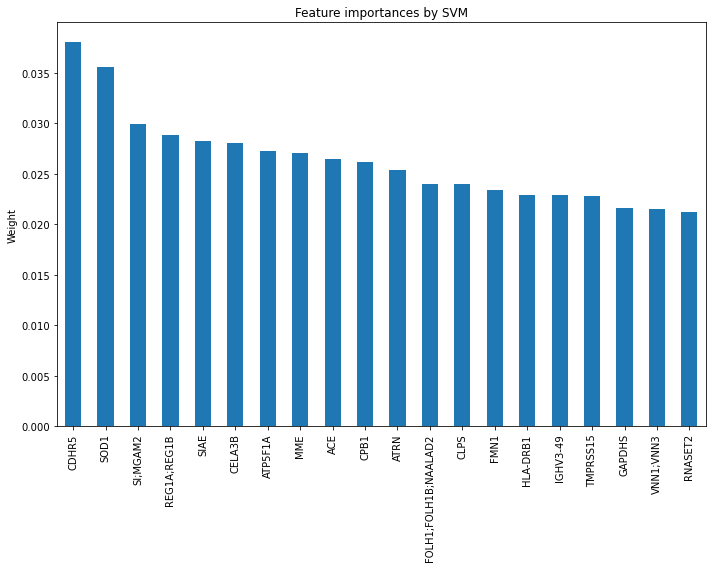

In [61]:
feat_imp = pd.Series(svm.coef_[0], index=df_combined.columns)
f_importances(feat_imp, 20)

In [ ]:
# https://www.kaggle.com/code/ritzig/classification-feature-selection-shap-tutorial
# 